In [19]:
import numpy as np
import matplotlib.pyplot as plt
import photutils
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import astropy
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture, CircularAnnulus

In [20]:
image_file = get_pkg_data_filename('..\\..\\Data\\2023_1_23\\Light\\Blue\\Reduced\\Reduced_star_Light_Blue_30_secs_001.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)

Filename: ..\..\Data\2023_1_23\Light\Blue\Reduced\Reduced_star_Light_Blue_30_secs_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   (4656, 3520)   float64   


In [21]:
hdulist = fits.open('..\\..\\Data\\2023_1_23\\Light\\Blue\\Reduced\\Reduced_star_Light_Blue_30_secs_001.fits')
data = hdulist[0].data
median = np.median(data)
tol = 5*median
fwhm = 5

In [22]:
dao = DAOStarFinder(tol, fwhm)
stars = dao(data)

positions = []

for i in range(len(stars)):
    posn = (stars['xcentroid'][i], stars['ycentroid'][i])
    positions.append(posn)

In [23]:
aperture = CircularAperture(positions, r=3.5*fwhm)
annulus_aperture = CircularAnnulus(positions, r_in=3.5*fwhm, r_out=(3.5*fwhm*np.sqrt(5)))

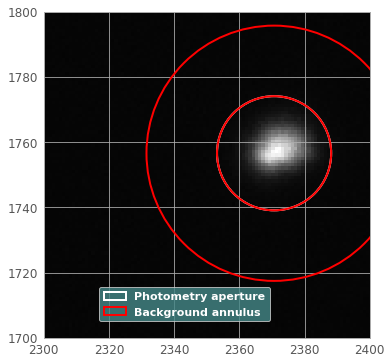

In [24]:
plt.imshow(image_data, cmap = 'gray')
plt.xlim(2300, 2400)
plt.ylim(1700, 1800)

ap_patches = aperture.plot(color='white', lw=2,
                           label='Photometry aperture')
ann_patches = annulus_aperture.plot(color='red', lw=2,
                                    label='Background annulus')
handles = (ap_patches[0], ann_patches[0])
plt.legend(loc=(0.17, 0.05), facecolor='#458989', labelcolor='white',
           handles=handles, prop={'weight': 'bold', 'size': 11})